<a href="https://colab.research.google.com/github/katelynllee/progpractice23/blob/main/social_anxiety_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import axes3d
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

drive.mount('/content/drive')
df_1 = pd.read_csv("/content/drive/MyDrive/final_data.csv")
df_1

Mounted at /content/drive


,id,Age,EducationLevel,Gender,HasFamilyHistory,Occupation,ATF,EAF,TKF,CMT,...,CP,NS,DZ,UR,UB,MD,TG,hasSAD,SPIN,LSAS
0,1,27,4,1,0,3,4,2,6,2,...,0,0,0,0,1,0,0,1,23,39.0
1,5,24,4,1,0,3,3,0,3,1,...,0,0,0,0,0,0,0,0,20,43.0
2,7,32,5,0,1,1,4,1,7,0,...,0,1,0,0,0,0,0,1,33,50.0
3,8,37,5,1,1,3,4,0,6,1,...,0,0,0,0,0,0,0,1,30,44.0
4,9,33,5,1,0,2,5,1,5,1,...,0,0,0,0,0,0,0,0,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,235,18,2,1,0,4,5,8,7,10,...,1,0,1,1,0,0,0,1,28,34.0
210,236,29,5,0,1,1,6,2,5,2,...,1,1,0,0,1,1,0,1,29,78.0
211,237,24,4,1,0,1,10,7,9,10,...,0,0,1,0,0,0,0,1,54,NaN
212,238,44,6,0,0,2,0,0,2,2,...,0,0,0,0,0,0,0,0,11,42.0


In [ ]:
df_1['Age Group'] = pd.cut(df_1['Age'], bins=[13,18,34,50,100], labels=['teen','young','middle','elder'])
df_1 = pd.get_dummies(df_1, columns=['Age Group'], prefix=['Age_Group'])
df_1.drop('Age', axis=1, inplace=True)
#bins= [13,18,34,50,100]
#labels = ['teen','young','middle','elder']
#df['Age Groups'] = df['Age'].apply(lambda x: pd.cut(x, bins, labels=labels))
#pd.cut(X_train_data['Age'], bins=bins, labels=labels, right=False)
#print(df.columns)
#df_1 = pd.get_dummies(df, columns=['AgeGroup'], prefix=['Age_Group'])
##print(df_1)
df_1

,id,EducationLevel,Gender,HasFamilyHistory,Occupation,ATF,EAF,TKF,CMT,DEF,...,UB,MD,TG,hasSAD,SPIN,LSAS,Age_Group_teen,Age_Group_young,Age_Group_middle,Age_Group_elder
0,1,4,1,0,3,4,2,6,2,0,...,1,0,0,1,23,39.0,0,1,0,0
1,5,4,1,0,3,3,0,3,1,0,...,0,0,0,0,20,43.0,0,1,0,0
2,7,5,0,1,1,4,1,7,0,0,...,0,0,0,1,33,50.0,0,1,0,0
3,8,5,1,1,3,4,0,6,1,0,...,0,0,0,1,30,44.0,0,0,1,0
4,9,5,1,0,2,5,1,5,1,1,...,0,0,0,0,16,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,235,2,1,0,4,5,8,7,10,0,...,0,0,0,1,28,34.0,1,0,0,0
210,236,5,0,1,1,6,2,5,2,3,...,1,1,0,1,29,78.0,0,1,0,0
211,237,4,1,0,1,10,7,9,10,6,...,0,0,0,1,54,NaN,0,1,0,0
212,238,6,0,0,2,0,0,2,2,0,...,0,0,0,0,11,42.0,0,0,1,0


In [ ]:
train_df, test_df = train_test_split(df_1, test_size = 0.3, random_state = 1)

In [ ]:
X = ['Age_Group_teen','Age_Group_young', 'Age_Group_middle', 'Age_Group_elder', 'Gender', 'EducationLevel', 'Occupation', 'ATF', 'EAF', 'ERF', 'DAF', 'HR', 'SW', 'DR', 'NS', 'UR', 'MD', 'TG']

X_train, X_test = train_df[X], test_df[X]
y_train, y_test = train_df['hasSAD'], test_df['hasSAD']

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
#print(r2_score(y_test,preds))
mae = mean_absolute_error(y_test, preds)
# Extract the coefficients (weights) and variable names
coefficients = model.coef_
variable_names = train_df[X].columns  # Assuming X is a pandas DataFrame with column names
# Print out the coefficients and variable names
for var, coef in zip(variable_names, coefficients[0]):
    print(f'Variable: {var}, Coefficient: {coef:.4f}')
print(mae)

Variable: Age_Group_teen, Coefficient: 0.1273
Variable: Age_Group_young, Coefficient: 0.2223
Variable: Age_Group_middle, Coefficient: 0.2898
Variable: Age_Group_elder, Coefficient: -0.6393
Variable: Gender, Coefficient: 0.1374
Variable: EducationLevel, Coefficient: -0.1288
Variable: Occupation, Coefficient: -0.3268
Variable: ATF, Coefficient: 0.2056
Variable: EAF, Coefficient: 0.1575
Variable: ERF, Coefficient: 0.3106
Variable: DAF, Coefficient: 0.4323
Variable: HR, Coefficient: 0.1655
Variable: SW, Coefficient: 0.3323
Variable: DR, Coefficient: -0.3012
Variable: NS, Coefficient: 0.0342
Variable: UR, Coefficient: 0.4088
Variable: MD, Coefficient: 0.0618
Variable: TG, Coefficient: -0.3242
0.24615384615384617


In [ ]:
#Random Forest Classifier
X = ['Age_Group_teen', 'Age_Group_young', 'Age_Group_middle', 'Age_Group_elder', 'Gender', 'HasFamilyHistory', 'EducationLevel', 'ATF', 'TKF', 'CMT', 'SMF', 'ERF', 'SW', 'DR']
X_train, X_test = train_df[X], test_df[X]
y_train, y_test = train_df['hasSAD'], test_df['hasSAD']


rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
# Extract the feature importances and variable names
feature_importances = rf.feature_importances_
variable_names = train_df[X].columns  # Assuming X is a pandas DataFrame with column names
# Print out the feature importances and variable names
for var, importance in zip(variable_names, feature_importances):
    print(f'Variable: {var}, Importance: {importance:.4f}')
print(mae)
#print(r2_score(y_test,preds))
#print(accuracy_score(y_test,y_pred))
print(mae)

Variable: Age_Group_teen, Importance: 0.0007
Variable: Age_Group_young, Importance: 0.0197
Variable: Age_Group_middle, Importance: 0.0225
Variable: Age_Group_elder, Importance: 0.0028
Variable: Gender, Importance: 0.0201
Variable: HasFamilyHistory, Importance: 0.0382
Variable: EducationLevel, Importance: 0.0611
Variable: ATF, Importance: 0.1695
Variable: TKF, Importance: 0.1853
Variable: CMT, Importance: 0.1314
Variable: SMF, Importance: 0.0877
Variable: ERF, Importance: 0.2274
Variable: SW, Importance: 0.0246
Variable: DR, Importance: 0.0090
0.3127692307692308
0.3127692307692308


<ipython-input-6-5160ab350fe9>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans_model.fit(X_train, y_train)


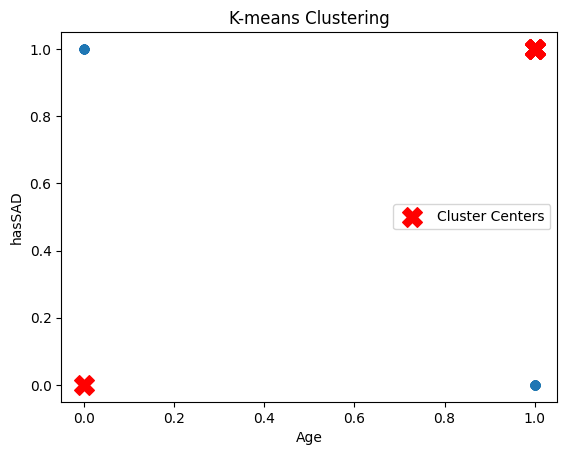

In [ ]:
features = df_1[['Age_Group_young', 'hasSAD']].values  # Adjust column names as needed
X = ['Age_Group_young']
X_train, X_test = train_df[X], test_df[X]
y_train, y_test = train_df['hasSAD'], test_df['hasSAD']

kmeans_model = KMeans(random_state=0, n_init="auto")
kmeans_model.fit(X_train, y_train)
label = kmeans_model.predict(X_test)
label.shape

# Get cluster assignments for each data point
labels = kmeans_model.labels_

# Get the cluster centers
centers = kmeans_model.cluster_centers_

# Create a scatter plot
plt.scatter(features[:, 0], features[:, 1])

# Plot the cluster centers as well
plt.scatter(centers[:, 0], centers[:,], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('hasSAD')
plt.legend()
plt.show()